In [1]:
import pandas as pd

df = pd.read_csv('CSVs\DevProcesoFormatoTipo11_04.csv', encoding='utf-8',)

df

,folio_recepcion,descripcion,fecha_visacion
0,2024476515,NO PROCESADO MEDIPASS,2024-04-11 00:00:00.000
1,2024473857,NO PROCESADO MEDIPASS,2024-04-11 00:00:00.000
2,2024476719,NO PROCESADO MEDIPASS,2024-04-11 00:00:00.000
3,2024482264,NO PROCESADO MEDIPASS,2024-04-11 00:00:00.000
4,2024473962,NO PROCESADO MEDIPASS,2024-04-11 00:00:00.000
...,...,...,...
61577,2023206425,FALTA COTIZ. SALUD,2023-04-11 00:00:00.000
61578,2023206425,FALTA COTIZ. SALUD,2023-04-11 00:00:00.000
61579,2023018074,FALTA COTIZ. SALUD,2023-04-11 00:00:00.000
61580,2022565788,SOBRE 60 ANIOS SIN PENSION,2023-04-10 00:00:00.000


In [ ]:
df['descripcion'].unique()

In [2]:


# Convertir la columna fecha_visacion a tipo datetime
df['fecha_visacion'] = pd.to_datetime(df['fecha_visacion'])

df['fecha_visacion'] = df['fecha_visacion'].dt.to_period('M')

# Reemplazar NaN en la columna 'descripcion' con la cadena "procesados"
#df['descripcion'].fillna("PROCESADOS NO DEVUELTOS", inplace=True)

# Contar la cantidad de errores por fecha
error_count_by_date = df.groupby(['fecha_visacion', 'descripcion']).count().unstack(fill_value=0).reset_index()

# Aplicar el filtro para seleccionar solo las filas a partir de agosto de 2023
error_count_by_date = error_count_by_date[error_count_by_date['fecha_visacion'] >= '2023-08']

error_count_by_date

fecha_visacion       folio_recepcion  \
descripcion                COTIZ < LIQ DE SUELDO   
4                  2023-08                  1779   
5                  2023-09                  1500   
6                  2023-10                  1511   
7                  2023-11                  1783   
8                  2023-12                  1289   
9                  2024-01                  1252   
10                 2024-02                  1207   
11                 2024-03                  1531   
12                 2024-04                   514   

                                                                    \
descripcion ERROR AL DESCARGAR ALGUNAS IMAGENES FALTA COTIZ. SALUD   
4                                             0                844   
5                                             0                717   
6                                             0                762   
7                                             0                890   
8                                             0                557   
9                                             0                443   
10                                            0                370   
11                                            0                481   
12                                            0                278   

                                                                            \
descripcion FECHA CONTRATO TRABAJO EQ FECHA AFILIACION ENTIDAD PREVISIONAL   
4                                                           33               
5                                                           22               
6                                                           28               
7                                                           24               
8                                                           11               
9                                                           18               
10                                                          15               
11                                                           8               
12                                                           5               

                                                                       \
descripcion NO DERECHO A PAGO SUBSIDIO NO HAY IMAGENES PARA DESCARGAR   
4                                    2                            329   
5                                    1                            153   
6                                    3                            230   
7                                    0                            292   
8                                    2                            228   
9                                    1                            204   
10                                   1                            147   
11                                   3                            143   
12                                   0                             94   

                                                       \
descripcion NO IMAGENES CON API NO PROCESADO MEDIPASS   
4                            97                  3161   
5                           223                  2881   
6                           290                  3308   
7                           499                  3422   
8                           265                  2703   
9                           275                  2252   
10                          209                  1963   
11                          533                  2267   
12                          559                  1156   

                                        \
descripcion NO SE ENCUENTRA CODIGO AFP   
4                                    4   
5                                    3   
6                                    4   
7                                    5   
8                                    0   
9                                    8   
10                                   2   

In [3]:

# Agregar una columna que indique la suma de los errores por fecha
error_count_by_date['TOTAL_PUBLICADOS'] = error_count_by_date.iloc[:, 1:].sum(axis=1)

error_percentages = error_count_by_date.copy()
for col in error_percentages.columns[1:-1]:
    error_percentages[col] = (error_percentages[col] / error_percentages['TOTAL_PUBLICADOS']) * 100


error_percentages

fecha_visacion       folio_recepcion  \
descripcion                COTIZ < LIQ DE SUELDO   
4                  2023-08             27.697338   
5                  2023-09             26.260504   
6                  2023-10             23.196193   
7                  2023-11             24.685034   
8                  2023-12             24.156672   
9                  2024-01             26.792211   
10                 2024-02             29.133478   
11                 2024-03             29.699321   
12                 2024-04             19.214953   

                                                                    \
descripcion ERROR AL DESCARGAR ALGUNAS IMAGENES FALTA COTIZ. SALUD   
4                                           0.0          13.140277   
5                                           0.0          12.552521   
6                                           0.0          11.697881   
7                                           0.0          12.321750   
8                                           0.0          10.438531   
9                                           0.0           9.479991   
10                                          0.0           8.930727   
11                                          0.0           9.330747   
12                                          0.0          10.392523   

                                                                            \
descripcion FECHA CONTRATO TRABAJO EQ FECHA AFILIACION ENTIDAD PREVISIONAL   
4                                                     0.513779               
5                                                     0.385154               
6                                                     0.429843               
7                                                     0.332272               
8                                                     0.206147               
9                                                     0.385192               
10                                                    0.362056               
11                                                    0.155189               
12                                                    0.186916               

                                                                       \
descripcion NO DERECHO A PAGO SUBSIDIO NO HAY IMAGENES PARA DESCARGAR   
4                             0.031138                       5.122217   
5                             0.017507                       2.678571   
6                             0.046055                       3.530857   
7                             0.000000                       4.042642   
8                             0.037481                       4.272864   
9                             0.021400                       4.365504   
10                            0.024137                       3.548154   
11                            0.058196                       2.774006   
12                            0.000000                       3.514019   

                                                       \
descripcion NO IMAGENES CON API NO PROCESADO MEDIPASS   
4                      1.510198             49.213763   
5                      3.904062             50.437675   
6                      4.451950             50.782929   
7                      6.908487             47.376436   
8                      4.966267             50.655922   
9                      5.884871             48.191740   
10                     5.044654             47.381125   
11                    10.339476             43.976722   
12                    20.897196             43.214953   

                                        \
descripcion NO SE ENCUENTRA CODIGO AFP   
4                             0.062276   
5                             0.052521   
6                             0.061406   
7                             0.069223   
8                             0.000000   
9                             0.171196   
10                            0.048274   

Reemplaza las columnas de eror_percentages

In [4]:

# Mostrar el resultadodf
#error_percentages.set_index('date', inplace=True)

#Con todos los errores
error_percentages.columns = [
    'date',
    'COTIZ < LIQ DE SUELDO',
    'ERROR AL DESCARGAR ALGUNAS IMAGENES',#nuevo
    'FALTA COTIZ. SALUD',
    'FECHA CONTRATO TRABAJO EQ FECHA AFILIACION ENTIDAD PREVISIONAL', 
    'NO DERECHO A PAGO SUBSIDIO',
    'NO HAY IMAGENES PARA DESCARGAR',
    'NO IMAGENES CON API',
    'NO PROCESADO MEDIPASS',
    'NO SE ENCUENTRA CODIGO AFP',
    'NO SE ENCUENTRAN MESES CON DIAS TRABAJADOS',
    'RENTA = TOPE',
    'SOBRE 60 ANIOS SIN PENSION',#nuevo
    'TOTAL_errores']

#Errores seleccionados



error_percentages

,date,COTIZ < LIQ DE SUELDO,ERROR AL DESCARGAR ALGUNAS IMAGENES,FALTA COTIZ. SALUD,FECHA CONTRATO TRABAJO EQ FECHA AFILIACION ENTIDAD PREVISIONAL,NO DERECHO A PAGO SUBSIDIO,NO HAY IMAGENES PARA DESCARGAR,NO IMAGENES CON API,NO PROCESADO MEDIPASS,NO SE ENCUENTRA CODIGO AFP,NO SE ENCUENTRAN MESES CON DIAS TRABAJADOS,RENTA = TOPE,SOBRE 60 ANIOS SIN PENSION,TOTAL_errores
4,2023-08,27.697338,0.0,13.140277,0.513779,0.031138,5.122217,1.510198,49.213763,0.062276,0.046707,2.662307,0.0,6423
5,2023-09,26.260504,0.0,12.552521,0.385154,0.017507,2.678571,3.904062,50.437675,0.052521,0.105042,3.606443,0.0,5712
6,2023-10,23.196193,0.0,11.697881,0.429843,0.046055,3.530857,4.451950,50.782929,0.061406,0.046055,5.756831,0.0,6514
7,2023-11,24.685034,0.0,12.321750,0.332272,0.000000,4.042642,6.908487,47.376436,0.069223,0.083068,4.181088,0.0,7223
8,2023-12,24.156672,0.0,10.438531,0.206147,0.037481,4.272864,4.966267,50.655922,0.000000,0.131184,5.134933,0.0,5336
9,2024-01,26.792211,0.0,9.479991,0.385192,0.021400,4.365504,5.884871,48.191740,0.171196,0.064199,4.643698,0.0,4673
10,2024-02,29.133478,0.0,8.930727,0.362056,0.024137,3.548154,5.044654,47.381125,0.048274,0.048274,5.479121,0.0,4143
11,2024-03,29.699321,0.0,9.330747,0.155189,0.058196,2.774006,10.339476,43.976722,0.116392,0.077595,3.472357,0.0,5155
12,2024-04,19.214953,0.0,10.392523,0.186916,0.000000,3.514019,20.897196,43.214953,0.037383,0.112150,2.429907,0.0,2675


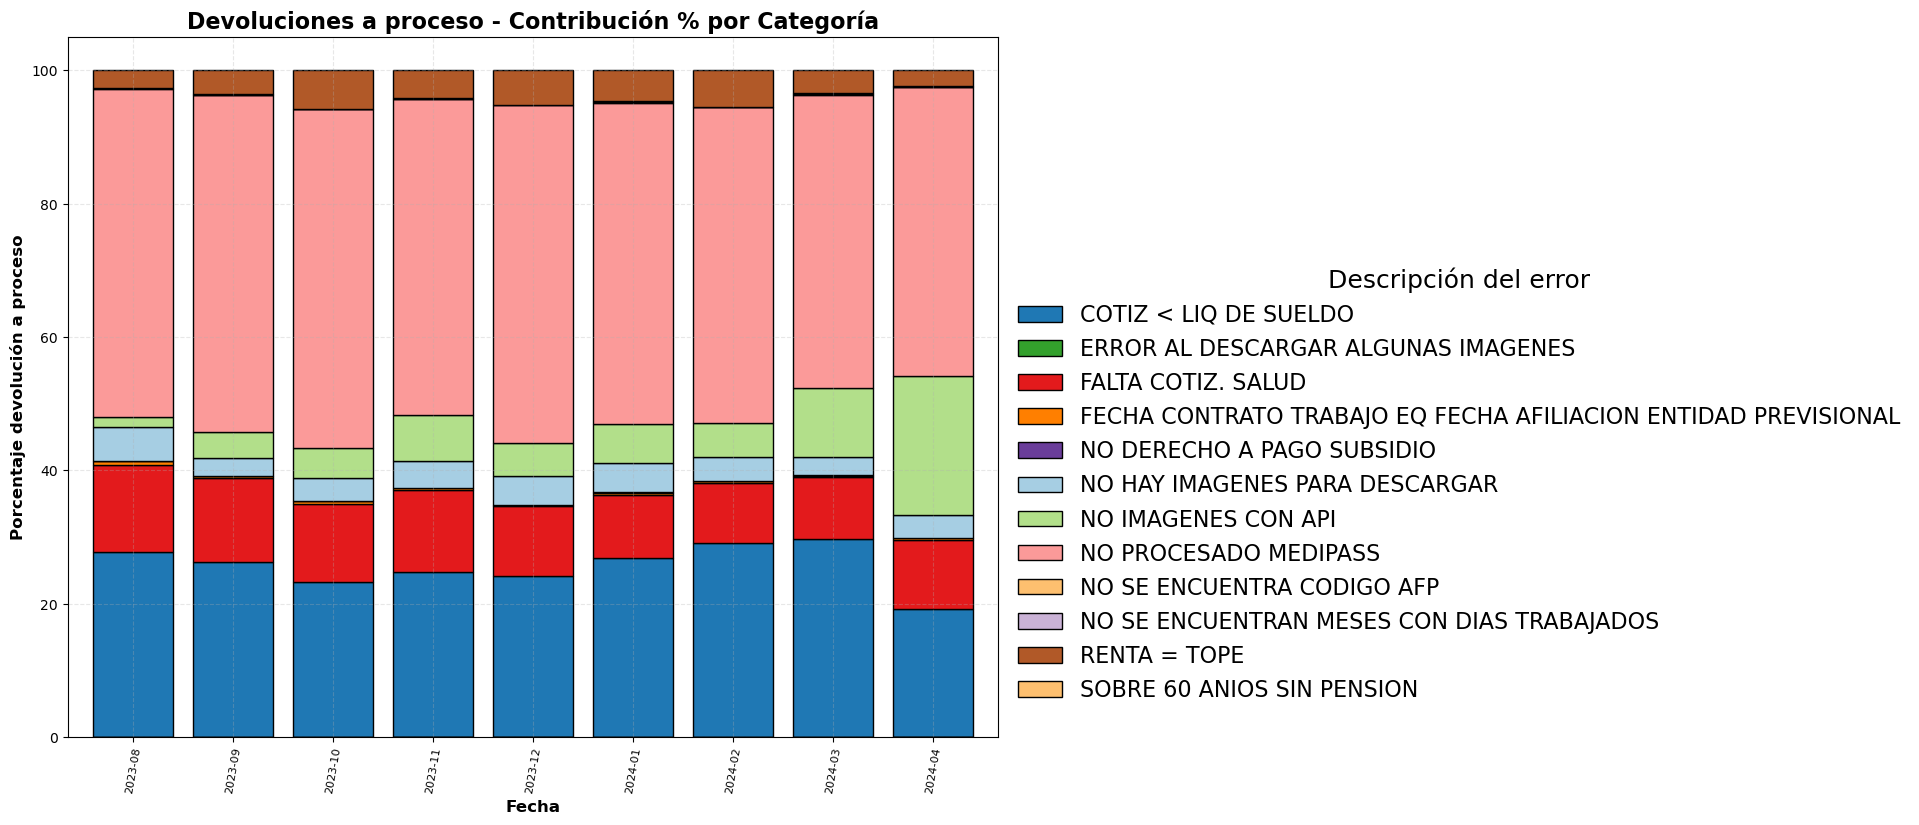

In [5]:
import matplotlib.pyplot as plt

from matplotlib.patches import PathPatch
from matplotlib.path import Path
#error_percentages['date'] = pd.to_datetime(error_percentages['date'])

columnas_grafica = [
    'date',
    'COTIZ < LIQ DE SUELDO',
    'ERROR AL DESCARGAR ALGUNAS IMAGENES',#nuevo
    'FALTA COTIZ. SALUD',
    'FECHA CONTRATO TRABAJO EQ FECHA AFILIACION ENTIDAD PREVISIONAL', 
    'NO DERECHO A PAGO SUBSIDIO',
    'NO HAY IMAGENES PARA DESCARGAR',
    'NO IMAGENES CON API',
    'NO PROCESADO MEDIPASS',
    'NO SE ENCUENTRA CODIGO AFP',
    'NO SE ENCUENTRAN MESES CON DIAS TRABAJADOS',
    'RENTA = TOPE',
    'SOBRE 60 ANIOS SIN PENSION'#nuevo
    ]



colores_distintivos = {
    'COTIZ < LIQ DE SUELDO': '#1f78b4',
    'ERROR AL DESCARGAR ALGUNAS IMAGENES': '#33a02c',
    'FALTA COTIZ. SALUD': '#e31a1c',
    'FECHA CONTRATO TRABAJO EQ FECHA AFILIACION ENTIDAD PREVISIONAL': '#ff7f00',
    'NO DERECHO A PAGO SUBSIDIO': '#6a3d9a',
    'NO HAY IMAGENES PARA DESCARGAR': '#a6cee3',
    'NO IMAGENES CON API': '#b2df8a',
    'NO PROCESADO MEDIPASS': '#fb9a99',
    'NO SE ENCUENTRA CODIGO AFP': '#fdbf6f',
    'NO SE ENCUENTRAN MESES CON DIAS TRABAJADOS': '#cab2d6',
    'RENTA = TOPE': '#b15928',
    'SOBRE 60 ANIOS SIN PENSION': '#fdbf6f'
}
fig, ax = plt.subplots(figsize=(12, 8))

ax = error_percentages[columnas_grafica].plot(kind='bar', stacked=True, x='date', color=[colores_distintivos[col] for col in columnas_grafica[1:]], width=0.8, edgecolor='black', ax=ax)
plt.xlabel('Fecha', fontsize=12, fontweight='bold')
plt.ylabel('Porcentaje devolución a proceso', fontsize=12, fontweight='bold')
plt.title('Devoluciones a proceso - Contribución % por Categoría', fontsize=16, fontweight='bold')
plt.legend(title='Descripción del error', bbox_to_anchor=(1, 0.7), loc='upper left', ncol=1, fontsize=16, title_fontsize=18, frameon=False )

plt.grid(True, linestyle='--', alpha=0.3)
#ax.set_facecolor('lightgray')
plt.xticks(range(len(error_percentages['date'])), error_percentages['date'], rotation=80)

# Ajustar el espacio ocupado por la sección de barras
plt.subplots_adjust(bottom=0.005)

plt.tick_params(axis='x', labelsize=8)

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

ax = error_percentages[columnas_grafica].plot(kind='bar', stacked=True, x='date', color=[colores_distintivos[col] for col in columnas_grafica[1:]], width=0.8, edgecolor='black', ax=ax)
plt.xlabel('Fecha', fontsize=12, fontweight='bold')
plt.ylabel('Porcentaje devolución a proceso', fontsize=12, fontweight='bold')
plt.title('Devoluciones a proceso - Contribución % por Categoría', fontsize=16, fontweight='bold', loc='center')  # Alinea el título al centro
plt.legend(title='Descripciones', bbox_to_anchor=(1, 0.7), loc='upper left', ncol=1, fontsize=10, frameon=False )

plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(range(len(error_percentages['date'])), error_percentages['date'], rotation=45, ha='right')  # Ajusta la rotación y alineación de las etiquetas del eje x
plt.yticks(fontsize=10)  # Aumenta el tamaño de la fuente en el eje y

# Ajustar el espacio ocupado por la sección de barras
plt.subplots_adjust(bottom=0.1)

# Añadir etiquetas en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=8)

plt.show()

Este no duncion... Todavia


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Tu DataFrame
data = {'date': ['2023-01-01', '2023-01-02', '2023-01-03'],
        'COTIZ < LIQ DE SUELDO': [10, 15, 8],
        'FALTA COTIZ. SALUD': [5, 12, 7],
        'FECHA CONTRATO TRABAJO EQ FECHA AFILIACION ENTIDAD PREVISIONAL': [8, 10, 15],
        'NO HAY IMAGENES PARA DESCARGAR': [20, 18, 25],
        'NO IMAGENES CON API': [12, 15, 10],
        'NO PROCESADO MEDIPASS': [8, 5, 12],
        'NO SE ENCUENTRA CODIGO AFP': [5, 8, 10],
        'RENTA = TOPE': [15, 20, 18],
        'TOTAL_errores': [5, 8, 10]}

df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'])

# Calcular porcentajes solo para columnas numéricas
columnas_numericas = df.select_dtypes(include=['number']).columns
porcentajes_errores = df[columnas_numericas].div(df['TOTAL_errores'], axis=0) * 100

# Paleta de colores distintiva
colores_distintivos = ['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a', '#a6cee3', '#b2df8a', '#fb9a99']

# Ajustar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Graficar barras agrupadas con la paleta de colores distintivos y patrones
ax = porcentajes_errores.plot(kind='bar', stacked=True, color=colores_distintivos, edgecolor='black', width=0.7)

# Asignar patrones diferentes a cada categoría
patrones_colores = ['/', '\\', '|', '-', '+', 'x', 'o', '*']
for i, (colname, hatch) in enumerate(zip(porcentajes_errores.columns, patrones_colores)):
    for bar in ax.patches[i::len(porcentajes_errores.columns)]:
        bar.set_hatch(hatch)

# Cambiar el tamaño de las etiquetas del eje x
plt.xticks(range(len(df['date'])), df['date'].dt.strftime('%Y-%m-%d'), rotation=45, fontsize=10)

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Errors by Category (Sorted by Percentage)')
plt.legend(title='Category', bbox_to_anchor=(1, 1), loc='upper left', ncol=1, fontsize=10, frameon=False)

plt.show()

